In [6]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path

sys.path.insert(0, "..")

In [11]:
import numpy as np
import sympy
import scipy
import scipy.optimize

import pyecca.control

from pyecca.control.time_allocation import find_cost_function, compute_trajectory
import matplotlib.pyplot as plt

In [13]:
n_legs = 1
poly_deg = 5
min_deriv = 3  # min jerk
bc_deriv = 3
cost = find_cost_function(
    poly_deg=poly_deg,
    min_deriv=min_deriv,
    rows_free=[],
    n_legs=n_legs,
    bc_deriv=bc_deriv,
)

NonInvertibleMatrixError: Matrix det == 0; not invertible.

T_opt [0.54390566 0.49709407 0.49709407 0.54390566]


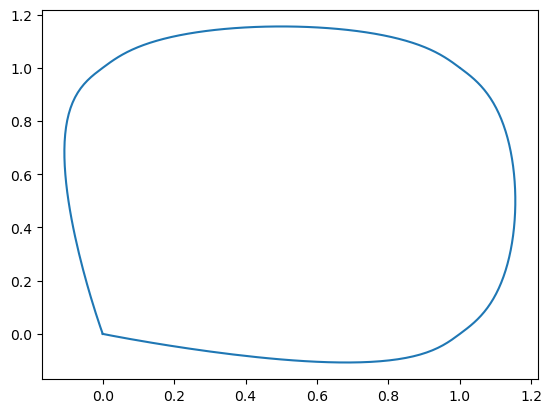

In [3]:
import numpy as np

n_dim = 2
k_time = 1e5  # weight on time
bc = np.array([# boundary conditions
    [
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0],
    ],  # pos
    [
        [0, 0],
        [1, 1],
        [-1, 1],
        [-1, -1],
        [0, 0],
    ],  # vel
    [
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
    ],  # acc
])

assert bc.shape[1] - 1 == n_legs
f_cost = lambda T: sum([cost["f_J"](T, bc[:, :, d], k_time) for d in range(n_dim)])

T0 = [10] * n_legs


sol = scipy.optimize.minimize(
    fun=f_cost, x0=[10] * n_legs, bounds=[(0.1, 100)] * n_legs
)

T_opt = sol["x"]

print("T_opt", T_opt)

opt_x = cost["f_p"](T_opt, bc[:, :, 0], k_time)
opt_y = cost["f_p"](T_opt, bc[:, :, 1], k_time)


def plot_traj(deriv=0):
    traj_x = compute_trajectory(opt_x, T_opt, poly_deg=poly_deg, deriv=deriv)
    traj_y = compute_trajectory(opt_y, T_opt, poly_deg=poly_deg, deriv=deriv)
    plt.plot(traj_x["t"], traj_x["x"], label="x")
    plt.plot(traj_y["t"], traj_y["x"], label="y")
    plt.legend()


fig = plt.figure()
traj_x = compute_trajectory(opt_x, T_opt, poly_deg=poly_deg, deriv=0)
traj_y = compute_trajectory(opt_y, T_opt, poly_deg=poly_deg, deriv=0)
ax = fig.add_subplot(111)
ax.plot(traj_x["x"], traj_y["x"]);